## PREDICTIVE MODELLING FOR HR ANALYTICS
Human Resources are critical resources of any organization. Organizations
spend huge amount of time and money to hire and nurture their employees. It
is a huge loss for companies if employees leave, especially the key resources.
So if HR can predict weather employees are at risk for leaving the company, it
will allow them to identify the attrition risks and help understand and provide
necessary support to retain those employees or do preventive hiring to
minimize the impact to the organization.

Predictive retention modeling allows organizations to identify high-risk
employees, build profiles of those most likely to leave or stay, and understand
how risk is distributed throughout the organization. Several innovative large
organizations have started building these kind of HR analytics with great
success in the past ears e.g. Google, HP,... . Ne t to the traditional HRIS
dashboard with descriptive turnover information, we see more and more
companies adding these predictive turnover information to their standard
reporting.

### Import Necessary Files and Data

In [1]:
# First import necessary libraries
import numpy as np
import pandas as pd
import pandas_profiling as pf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from patsy import dmatrices as dm
# SciKit Learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# Statsmodel Package
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Miscellanous Settings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

In [2]:
# Now import the data
hr_data = pd.read_csv("HR_comma_sep.csv")

### Perform EDA, Data Preparation and create Data Audit Report

In [3]:
# Lets's look at the data
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#Check for null values
hr_data[(hr_data.satisfaction_level.isna() == True) | (hr_data.salary.isna() == True) | (hr_data.last_evaluation.isna() == True) | (hr_data.number_project.isna() == True) | (hr_data.average_montly_hours.isna() == True) | (hr_data.time_spend_company.isna() == True) | (hr_data.Work_accident.isna() == True) | (hr_data.left.isna() == True) | (hr_data.promotion_last_5years.isna() == True) | (hr_data.department.isna() == True)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


#### As we see there are no null values to handle, we move on

In [6]:
# Create a Pandas Profiling Report
#pf.ProfileReport(hr_data)

In [7]:
# From pandas profiling We clearly see 3008 rows to be duplicated
# So we perform a check and remove those rows
#Unique rows
hr_data.loc[~hr_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [8]:
#Drop the duplicate rows keeping the first unique rows intact
hr_data.drop_duplicates(keep="first", inplace=True)

In [9]:
#Let's check the data again
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
#pf.ProfileReport(hr_data)

In [12]:
#Pairwise distribution
#sns.pairplot(hr_data)
plt.show()

In [13]:
# Separate out the numerical and categorical data
num_cols = [key for key in dict(hr_data.dtypes) if dict(hr_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_cols = [key for key in dict(hr_data.dtypes) if dict(hr_data.dtypes)[key] in ['object', 'O']]
print(num_cols)
print(cat_cols)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


#### Handle the Categorical Features

In [14]:
hr_data[cat_cols]

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
11995,management,high
11996,management,high
11997,management,high
11998,marketing,high


#### Create dummies for Department as it is Nominal inherently

In [15]:
dept_dummies = pd.get_dummies(hr_data["department"]).drop(['technical'], axis=1)
dept_dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0
11996,0,0,0,0,1,0,0,0,0
11997,0,0,0,0,1,0,0,0,0
11998,0,0,0,0,0,1,0,0,0


In [16]:
# Append the data to initial dataframe
hr_data = pd.concat([hr_data, dept_dummies], axis=1)
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,0,0,0,0,1,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,management,high,0,0,0,0,1,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,management,high,0,0,0,0,1,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,0,0,0,0,0,1,0,0,0


#### Encode Salary as it is Ordinal in nature as follows -
- 1 = Low
- 2 = Medium
- 3 = High

In [17]:
hr_data["Sal_Encoded"] = np.where(hr_data.salary=="low", 1, (np.where(hr_data.salary=="medium", 2, 3)))
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,Sal_Encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,0,0,0,0,1,0,0,0,0,3
11996,0.74,0.95,5,266,10,0,0,1,management,high,0,0,0,0,1,0,0,0,0,3
11997,0.85,0.54,3,185,10,0,0,1,management,high,0,0,0,0,1,0,0,0,0,3
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,0,0,0,0,0,1,0,0,0,3


In [18]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'Sal_Encoded'],
      dtype='object')

In [19]:
# Handle the outliers
hr_data[num_cols] = hr_data[num_cols].apply(lambda x: x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99)))

#### Generate the Data Audit Report
- Add the Ordinal Variable "Sal_Encoded" also to the numerical data auditing process

In [20]:
num_cols.append('Sal_Encoded')
num_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Sal_Encoded']

In [21]:
#Numerical Features
def var_summary(x):
    return(pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                    index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX']))

In [22]:
num_summary = hr_data[num_cols].apply(var_summary)
num_summary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sal_Encoded
N,11991.000000,11991.000000,11991.000000,1.199100e+04,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
NMISS,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,7550.330000,8595.650000,45600.000000,2.403413e+06,40134.000000,1850.000000,1991.000000,203.000000,19232.000000
MEAN,0.629666,0.716842,3.802852,2.004347e+02,3.347010,0.154282,0.166041,0.016929,1.603870
MEDIAN,0.660000,0.720000,4.000000,2.000000e+02,3.000000,0.000000,0.000000,0.000000,2.000000
STD,0.240740,0.168023,1.163238,4.848574e+01,1.252224,0.361234,0.372133,0.129012,0.635900
VAR,0.057956,0.028232,1.353123,2.350867e+03,1.568064,0.130490,0.138483,0.016644,0.404369
MIN,0.100000,0.390000,2.000000,1.040000e+02,2.000000,0.000000,0.000000,0.000000,1.000000
P1,0.100000,0.390000,2.000000,1.040000e+02,2.000000,0.000000,0.000000,0.000000,1.000000
P5,0.140000,0.470000,2.000000,1.300000e+02,2.000000,0.000000,0.000000,0.000000,1.000000


In [23]:
#For categorical features
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])
cat_summary = hr_data[cat_cols].apply(cat_summary)
cat_summary

,department,salary
N,11991,11991
NMISS,0,0
ColumnsNames,sales 3239 technical 2244 suppor...,low 5740 medium 5261 high 990 N...


In [24]:
# Export this report
num_summary.to_html("Numerical Data Report.html")
cat_summary.to_html("Categorical Data Report.html")

#### Now since the Data Audit Report is generated, continue on the EDA and do some Feature Engineering if required

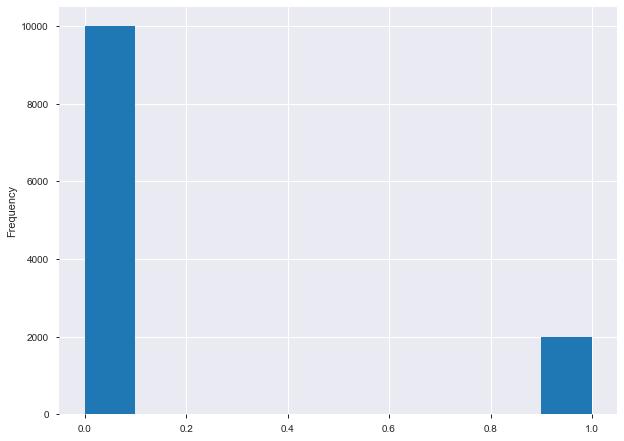

In [25]:
hr_data.left.plot(kind="hist", x=hr_data.Sal_Encoded, y=hr_data.left)
plt.show()

#### Checking For Multicolinearity

In [26]:
#1 Via Correlation Matrix
hr_data.corr().to_csv("Correlation Data.csv")
# Initial look doesn't seem to display any multicolinearity

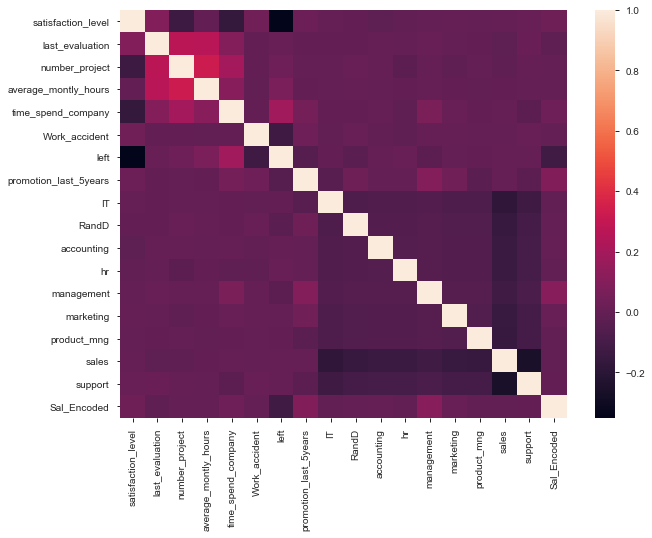

In [27]:
# Heatmap
sns.heatmap(hr_data.corr())
plt.show()

In [28]:
#2 Check via VIF values
a,b = dm(formula_like='left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years', data=hr_data, return_type='dataframe')
#Create an empty dataframe to hold VIF values
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['Features'] = b.columns
vif
# VIF Values are also acceptable

,VIF Factor,Features
0,42.411483,Intercept
1,1.064631,satisfaction_level
2,1.145189,last_evaluation
3,1.226315,number_project
4,1.168007,average_montly_hours
5,1.074786,time_spend_company
6,1.002661,Work_accident
7,1.004922,promotion_last_5years


In [29]:
hr_data.drop(['department', 'salary'], axis=1, inplace=True)
# Remove the target variable from dataframe for calculation purposes
# hr_data_new = Dataframe without target variable
hr_data_new = hr_data[hr_data.columns.difference(["left"])]
hr_data_new

,IT,RandD,Sal_Encoded,Work_accident,accounting,average_montly_hours,hr,last_evaluation,management,marketing,number_project,product_mng,promotion_last_5years,sales,satisfaction_level,support,time_spend_company
0,0,0,1,0,0,157,0,0.53,0,0,2,0,0,1,0.38,0,3
1,0,0,2,0,0,262,0,0.86,0,0,5,0,0,1,0.80,0,6
2,0,0,2,0,0,272,0,0.88,0,0,7,0,0,1,0.11,0,4
3,0,0,1,0,0,223,0,0.87,0,0,5,0,0,1,0.72,0,5
4,0,0,1,0,0,159,0,0.52,0,0,2,0,0,1,0.37,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,3,1,0,259,0,0.55,1,0,3,0,1,0,0.90,0,8
11996,0,0,3,0,0,266,0,0.95,1,0,5,0,1,0,0.74,0,8
11997,0,0,3,0,0,185,0,0.54,1,0,3,0,1,0,0.85,0,8
11998,0,0,3,0,0,172,0,0.65,0,1,3,0,1,0,0.33,0,8


In [30]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
IT                         uint8
RandD                      uint8
accounting                 uint8
hr                         uint8
management                 uint8
marketing                  uint8
product_mng                uint8
sales                      uint8
support                    uint8
Sal_Encoded                int32
dtype: object

In [31]:
# Let's normalize the features
#for feature in hr_data_new:
#    hr_data_new[feature] = hr_data_new[feature].apply(lambda x: (x-hr_data_new[feature].mean())/hr_data_new[feature].std())
#hr_data_new

In [32]:
#binned = pd.cut(hr_data_new['satisfaction_level'], bins=10, labels=list(range(1,11)))
#odds = hr_data.groupby(by=[binned])[['left']].sum()/(hr_data.groupby(by=[binned])[['left']].count() - hr_data.groupby(by=[binned])[['left']].sum())
#log_odds = np.log(odds).reset_index()
#sns.barplot(x='satisfaction_level', y='left', data=log_odds)

#### Check which Variables are Important and which are insignificant
#### Then drop the insignificant ones

#### 1 Using Log Odds Interpretation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


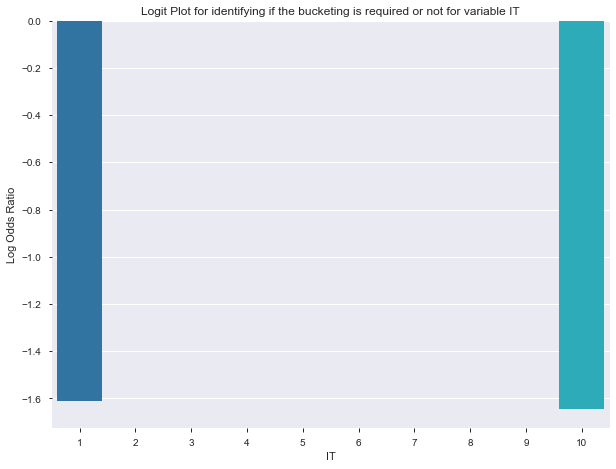

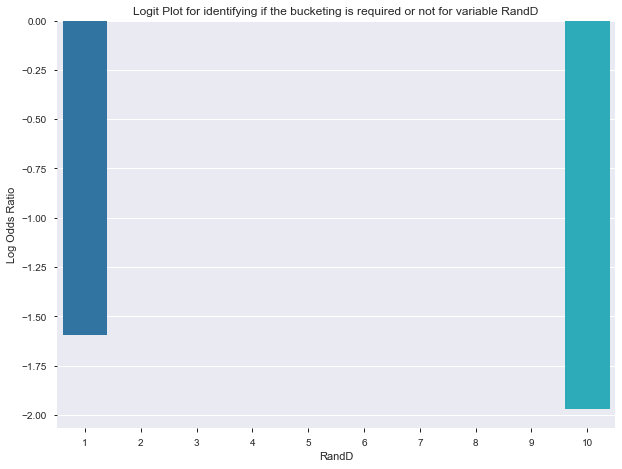

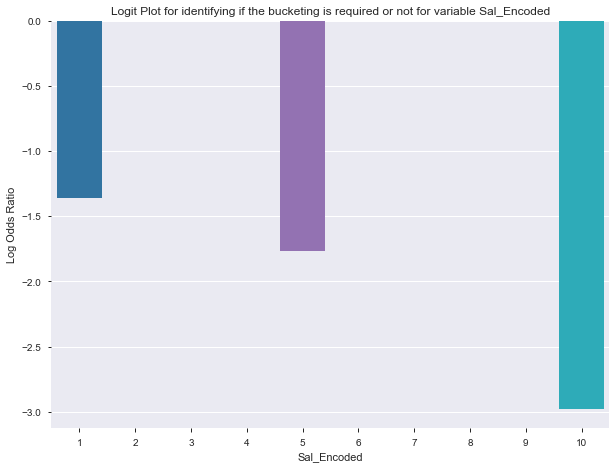

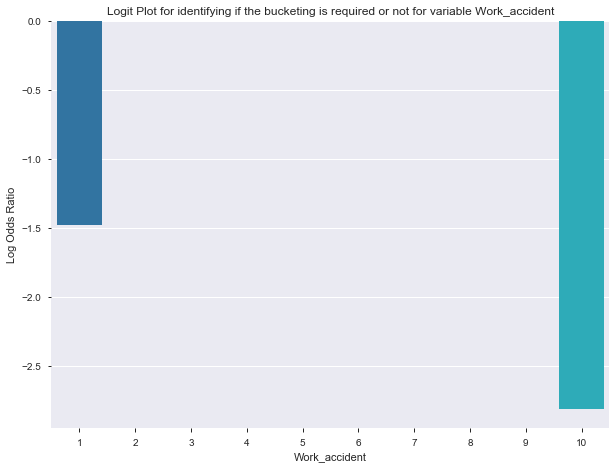

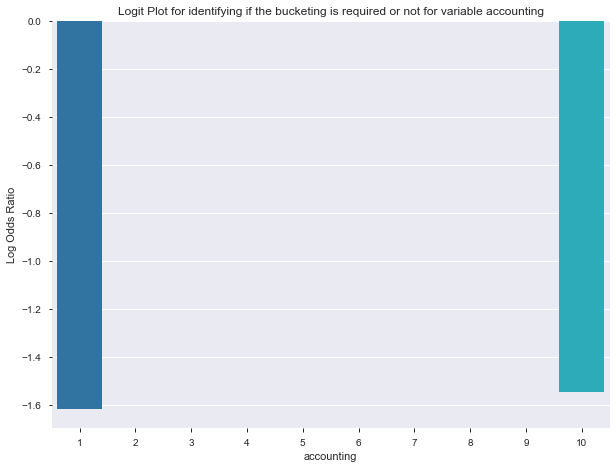

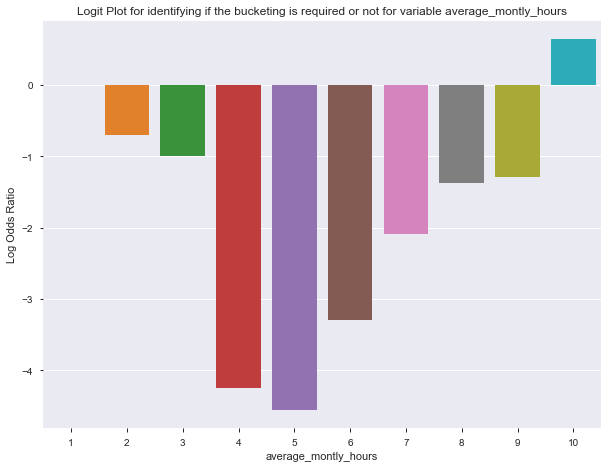

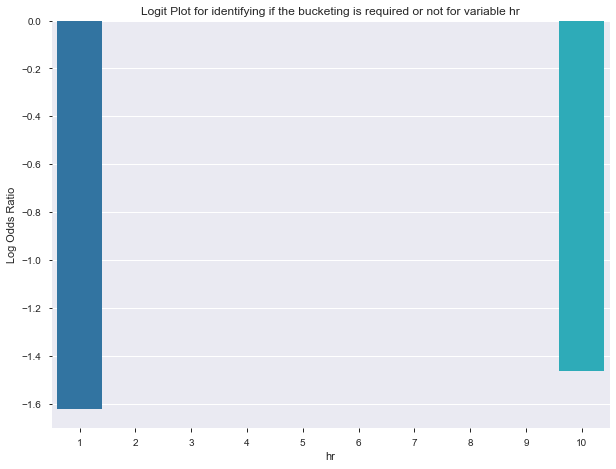

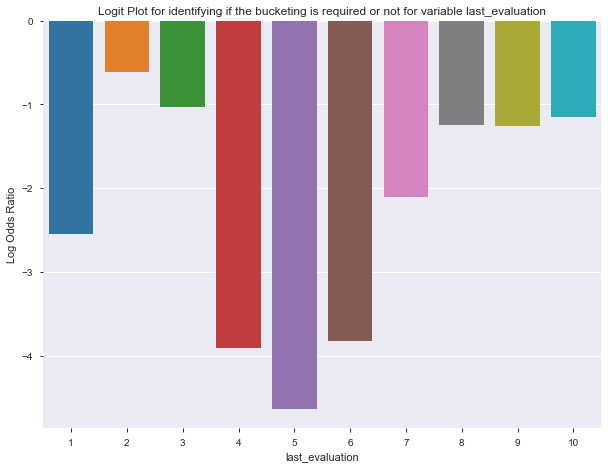

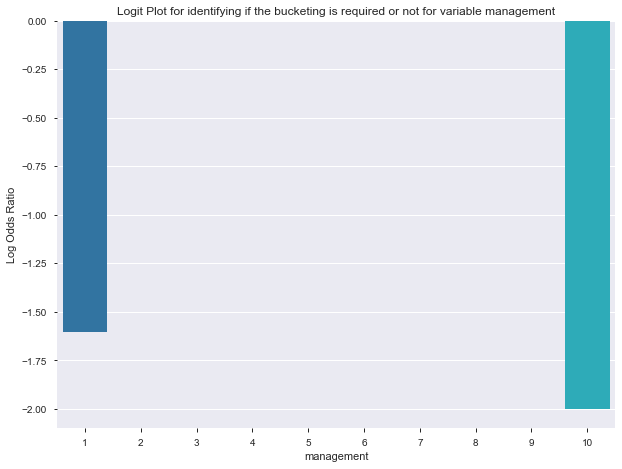

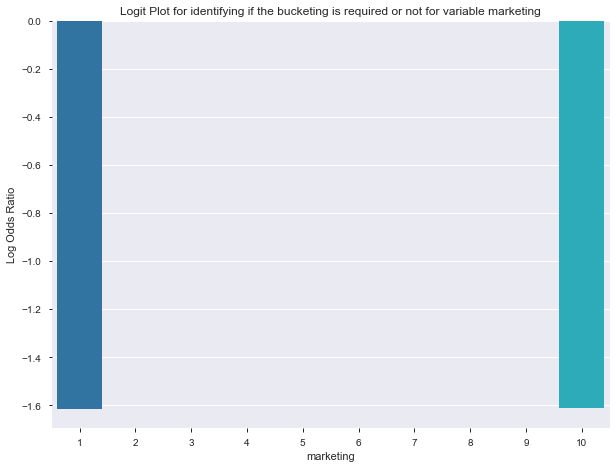

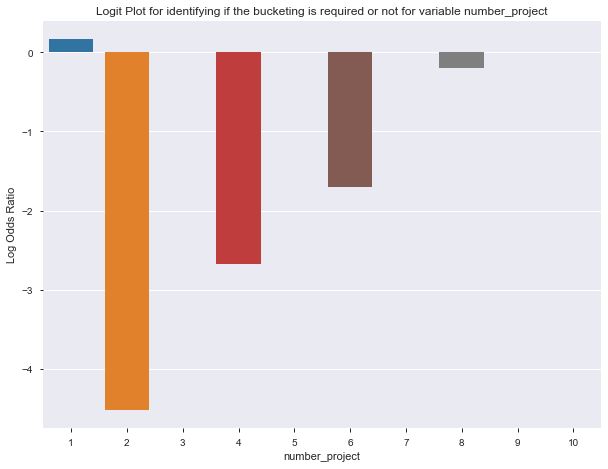

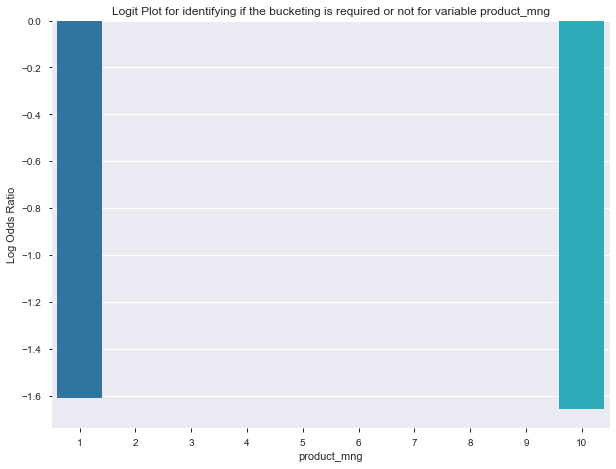

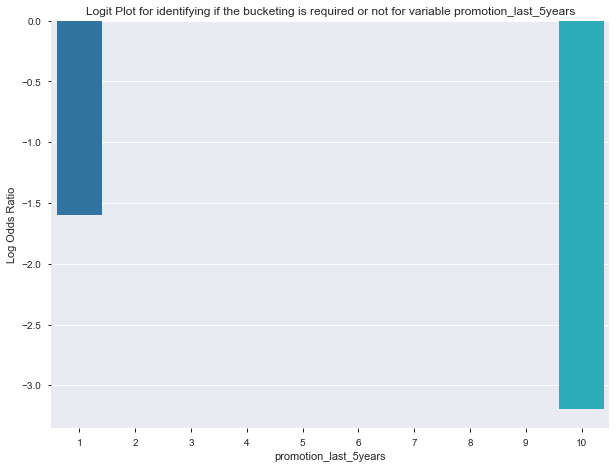

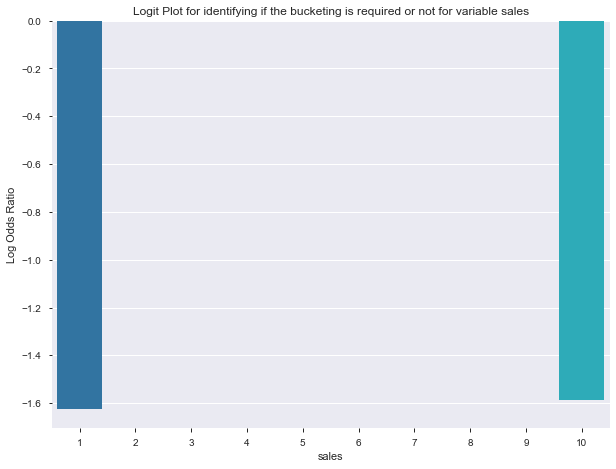

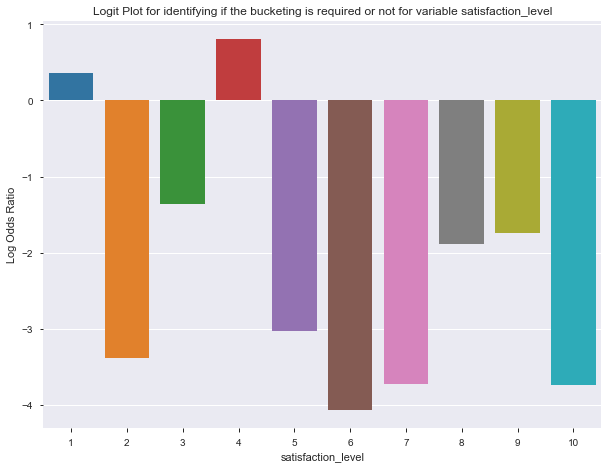

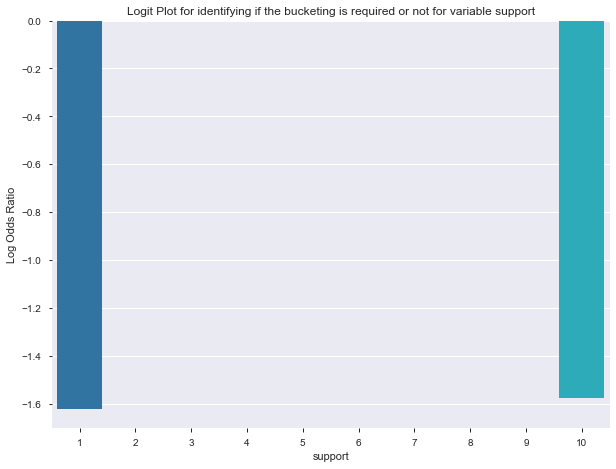

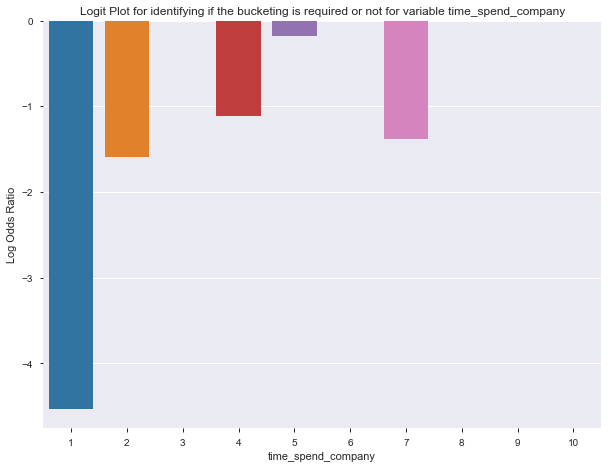

In [33]:
bp = PdfPages('Transformation Plots For HR Analytics.pdf')

for feature in hr_data_new:
    binned = pd.cut(hr_data_new[feature], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    odds = hr_data.groupby(by=[binned])[['left']].sum()/(hr_data.groupby(by=[binned])[['left']].count() - hr_data.groupby(by=[binned])[['left']].sum())
    log_odds = np.log(odds).reset_index()
    fig, axes = plt.subplots(figsize=(10,7.5))
    sns.barplot(x=feature, y='left', data=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(feature))
    bp.savefig(fig)
bp.close()

#### 2 Univariate Regression

In [34]:
hr_data_new.columns

Index(['IT', 'RandD', 'Sal_Encoded', 'Work_accident', 'accounting',
       'average_montly_hours', 'hr', 'last_evaluation', 'management',
       'marketing', 'number_project', 'product_mng', 'promotion_last_5years',
       'sales', 'satisfaction_level', 'support', 'time_spend_company'],
      dtype='object')

In [35]:
logit_model = sm.logit(formula='left~satisfaction_level', data=hr_data).fit()
p = logit_model.predict(hr_data)
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.390184
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11989
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.1321
Time:                        23:49:17   Log-Likelihood:                -4678.7
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                1.423e-311
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5528      0.060      9.152      0.000       0.434       0.671
satisfaction_level    -3.8815      0.110    -35.417      0.000      -4.096      -3.667
======================================================================================
"""

In [36]:
logreg_model = sm.logit(formula='left~hr', data=hr_data).fit().predict()

Optimization terminated successfully.
         Current function value: 0.449464
         Iterations 6


In [37]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,Sal_Encoded
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,8,1,0,1,0,0,0,0,1,0,0,0,0,3
11996,0.74,0.95,5,266,8,0,0,1,0,0,0,0,1,0,0,0,0,3
11997,0.85,0.54,3,185,8,0,0,1,0,0,0,0,1,0,0,0,0,3
11998,0.33,0.65,3,172,8,0,0,1,0,0,0,0,0,1,0,0,0,3


In [38]:
# Performing Univariate Reg for all columns individually and clubbing the Somer's D values
uvr_table = pd.DataFrame()
for feature in hr_data_new:
    logreg_model = sm.logit(formula='left~'+str(feature), data=hr_data).fit()
    p_values = pd.DataFrame(logreg_model.predict())
    p_values.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(hr_data['left'], p_values) - 1
    temp_df = pd.DataFrame({'Variable' : [feature], 'Somers D':[somers_d]})
    uvr_table = pd.concat([uvr_table, temp_df], axis=0)
uvr_table.reset_index(drop=True)

Optimization terminated successfully.
         Current function value: 0.449548
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.442108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.439856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.449536
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.447319
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449464
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449467
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449553
  

,Variable,Somers D
0,IT,0.002443
1,RandD,0.018208
2,Sal_Encoded,0.158608
3,Work_accident,0.121763
4,accounting,0.003546
5,average_montly_hours,0.073900
6,hr,0.007955
7,last_evaluation,0.008944
8,management,0.012282
9,marketing,0.000153


#### From Somer's Delta Values, the following features have to be dropped as their values are too low
- IT
- RandD
- accounting
- hr
- last_evaluation
- marketing
- product_mng
- sales
- support

In [39]:
hr_data_new = hr_data_new.drop(['IT', 'RandD', 'accounting', 'hr', 'last_evaluation', 'marketing', 'product_mng', 'sales', 'support'], axis=1)
hr_data_new

,Sal_Encoded,Work_accident,average_montly_hours,management,number_project,promotion_last_5years,satisfaction_level,time_spend_company
0,1,0,157,0,2,0,0.38,3
1,2,0,262,0,5,0,0.80,6
2,2,0,272,0,7,0,0.11,4
3,1,0,223,0,5,0,0.72,5
4,1,0,159,0,2,0,0.37,3
...,...,...,...,...,...,...,...,...
11995,3,1,259,1,3,1,0.90,8
11996,3,0,266,1,5,1,0.74,8
11997,3,0,185,1,3,1,0.85,8
11998,3,0,172,0,3,1,0.33,8


In [40]:
# Check the VIF values again
uvr_table = pd.DataFrame()
for feature in hr_data_new:
    logreg_model = sm.logit(formula='left~'+str(feature), data=hr_data).fit()
    p_values = pd.DataFrame(logreg_model.predict())
    p_values.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(hr_data['left'], p_values) - 1
    temp_df = pd.DataFrame({'Variable' : [feature], 'Somers D':[somers_d]})
    uvr_table = pd.concat([uvr_table, temp_df], axis=0)
uvr_table.reset_index(drop=True)

Optimization terminated successfully.
         Current function value: 0.442108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.439856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447319
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449078
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.448197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390184
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433269
         Iterations 6


,Variable,Somers D
0,Sal_Encoded,0.158608
1,Work_accident,0.121763
2,average_montly_hours,0.073900
3,management,0.012282
4,number_project,-0.012013
5,promotion_last_5years,0.015482
6,satisfaction_level,0.494017
7,time_spend_company,0.381564


#### Splitting Data into Train and Test Data

In [41]:
hr_data_new['left'] = hr_data['left']
train, test = train_test_split(hr_data_new, test_size=0.3, random_state=42)

In [42]:
train.reset_index(drop=True, inplace=True)
train.head()

,Sal_Encoded,Work_accident,average_montly_hours,management,number_project,promotion_last_5years,satisfaction_level,time_spend_company,left
0,3,0,111,0,3,0,0.96,2,0
1,2,1,188,0,4,0,0.19,4,0
2,3,0,148,0,2,0,0.45,3,1
3,2,0,154,0,4,0,0.72,3,0
4,1,1,279,0,2,0,0.54,3,0


In [43]:
test.reset_index(drop=True, inplace=True)
test.head()

,Sal_Encoded,Work_accident,average_montly_hours,management,number_project,promotion_last_5years,satisfaction_level,time_spend_company,left
0,1,0,293,0,6,0,0.10,5,1
1,2,0,154,0,4,0,0.74,4,0
2,1,0,212,0,4,0,0.81,2,0
3,1,0,149,0,2,0,0.37,3,1
4,1,0,272,0,6,0,0.10,4,1


### Building the model

In [44]:
logreg_model_final = sm.logit(formula='left~Sal_Encoded+Work_accident+average_montly_hours+management+number_project+promotion_last_5years+satisfaction_level+time_spend_company', data=train).fit()
# Model Summary
logreg_model_final.summary()

Optimization terminated successfully.
         Current function value: 0.359817
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 8393
Model:                          Logit   Df Residuals:                     8384
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.1977
Time:                        23:49:18   Log-Likelihood:                -3019.9
converged:                       True   LL-Null:                       -3764.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4274      0.193      2.217      0.027       0.050       0.805
Sal_Encoded              -0.6436      0.057    -11.362      0.000      -0.755      -0.533
Work_accident            -1.3204      0.128    -10.312      0.000      -1.571      -1.069
average_montly_hours      0.0043      0.001      6.029      0.000       0.003       0.006
management               -0.2718      0.189     -1.440      0.150      -0.642       0.098
number_project           -0.2516      0.029     -8.592      0.000      -0.309      -0.194
promotion_last_5years    -1.4075      0.444     -3.168      0.002      -2.278      -0.537
satisfaction_level       -3.8147      0.141    -27.101      0.000      -4.091      -3.539
time_spend_company        0.3661      0.026     14.109      0.000       0.315       0.417
=========================================================================================
"""

#### Model Equation =>
- LE = 0.6436Sal_Encoded - 1.3204Work_accident + 0.0043average_montly_hours - 0.2718management - 0.2516number_project - 1.4075promotion_last_5years - 3.8147satisfaction_level + 0.3661time_spend_company
- P = exp(LE)/(1+exp(LE))

#### Metrics for Train Data

In [45]:
#1 Gini Score
train_gini = 2*metrics.roc_auc_score(train['left'], logreg_model_final.predict(train)) - 1
print("Gini Score for Train Data {}".format(train_gini))

test_gini = 2*metrics.roc_auc_score(test['left'], logreg_model_final.predict(test)) - 1
print("Gini Score for Test Data {}".format(test_gini))

Gini Score for Train Data 0.6450165279226241
Gini Score for Test Data 0.6744092558908301


In [46]:
#2 AUC Scores
train_auc = metrics.roc_auc_score(train['left'], logreg_model_final.predict(train))
print("AUC Score for Train Data {}".format(train_auc))

test_auc = metrics.roc_auc_score(test['left'], logreg_model_final.predict(test))
print("AUC Score for Test Data {}".format(test_auc))

AUC Score for Train Data 0.822508263961312
AUC Score for Test Data 0.8372046279454151


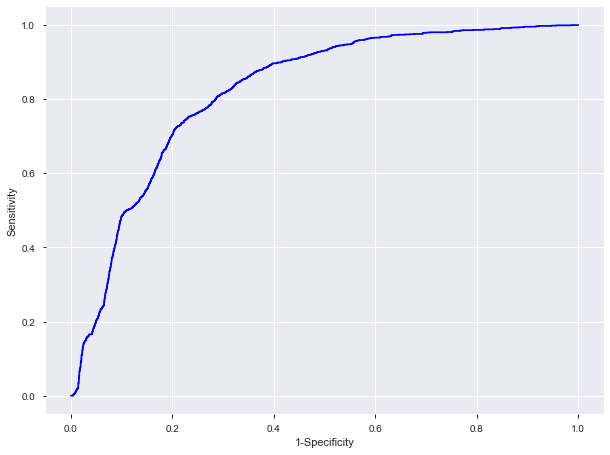

In [47]:
#3.1 ROC curve for Train Data
fpr, tpr, threshold = metrics.roc_curve(y_true=train['left'], y_score=logreg_model_final.predict())
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

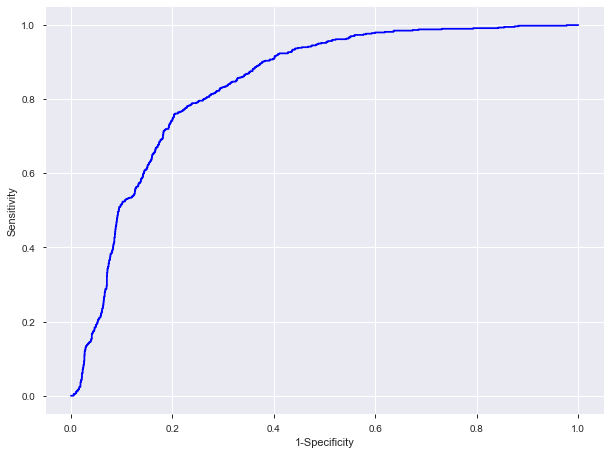

In [48]:
#3.2 ROC curve for Train Data
fpr, tpr, threshold = metrics.roc_curve(y_true=test['left'], y_score=logreg_model_final.predict(test))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

In [49]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
## For Train Data
train_pred = pd.DataFrame(logreg_model_final.predict(train))
train_pred.columns = ['left_prob']
train_comparison = pd.concat([pd.DataFrame(train['left']), train_pred], axis=1)
train_comparison

,left,left_prob
0,0,0.008962
1,0,0.163843
2,1,0.121139
3,0,0.054931
4,0,0.143222
...,...,...
8388,0,0.491770
8389,0,0.059165
8390,0,0.032355
8391,1,0.346260


In [50]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
## For Test Data
test_pred = pd.DataFrame(logreg_model_final.predict(test))
test_pred.columns = ['left_prob']
test_comparison = pd.concat([pd.DataFrame(test['left']), test_pred], axis=1)
test_comparison

,left,left_prob
0,1,0.730417
1,0,0.072067
2,0,0.065443
3,1,0.404945
4,1,0.631661
...,...,...
3593,0,0.076921
3594,0,0.208366
3595,0,0.128622
3596,0,0.650042


#### Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity

In [51]:
roc_like_df = pd.DataFrame()
train_temp = train_comparison.copy()
for cutoff in np.linspace(0,1,100):
    train_temp['Predicted'] = train_temp['left_prob'].apply(lambda x: 1.0 if x>cutoff else 0.0)
    train_temp['TP'] = np.where((train_temp['Predicted']==1) & (train_temp['left']==1), 1, 0)
    train_temp['FP'] = np.where((train_temp['Predicted']==1) & (train_temp['left']==0), 1, 0)
    train_temp['TN'] = np.where((train_temp['Predicted']==0) & (train_temp['left']==0), 1, 0)
    train_temp['FN'] = np.where((train_temp['Predicted']==0) & (train_temp['left']==1), 1, 0)
    sensitivity = train_temp['TP'].sum()/(train_temp['TP'].sum() + train_temp['FN'].sum())
    specificity = train_temp['TN'].sum()/(train_temp['TN'].sum() + train_temp['FP'].sum())
    accuracy = (train_temp['TP'].sum() + train_temp['TN'].sum())/ (train_temp['TP'].sum() + train_temp['TN'].sum() + train_temp['FP'].sum() + train_temp['FN'].sum())
    roc_like_df = pd.concat([roc_like_df, (pd.DataFrame({'Cut-Off':[cutoff], 'Sensitivity':[sensitivity], 'Specificity':[specificity], 'Accuracy':[accuracy]}))], axis=0)
roc_like_df.reset_index(drop=True)

,Cut-Off,Sensitivity,Specificity,Accuracy
0,0.000000,1.000000,0.000000,0.165376
1,0.010101,0.999280,0.028694,0.189205
2,0.020202,0.995677,0.092220,0.241630
3,0.030303,0.989193,0.164168,0.300608
4,0.040404,0.984150,0.241256,0.364113
...,...,...,...,...
95,0.959596,0.000000,1.000000,0.834624
96,0.969697,0.000000,1.000000,0.834624
97,0.979798,0.000000,1.000000,0.834624
98,0.989899,0.000000,1.000000,0.834624
